In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
%matplotlib inline
#-------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split . 

In [0]:
boston = load_boston()                          #load_dataset boston

In [0]:
bos = pd.DataFrame(boston.data)

In [44]:
bos.columns = boston.feature_names                #setting columns' names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


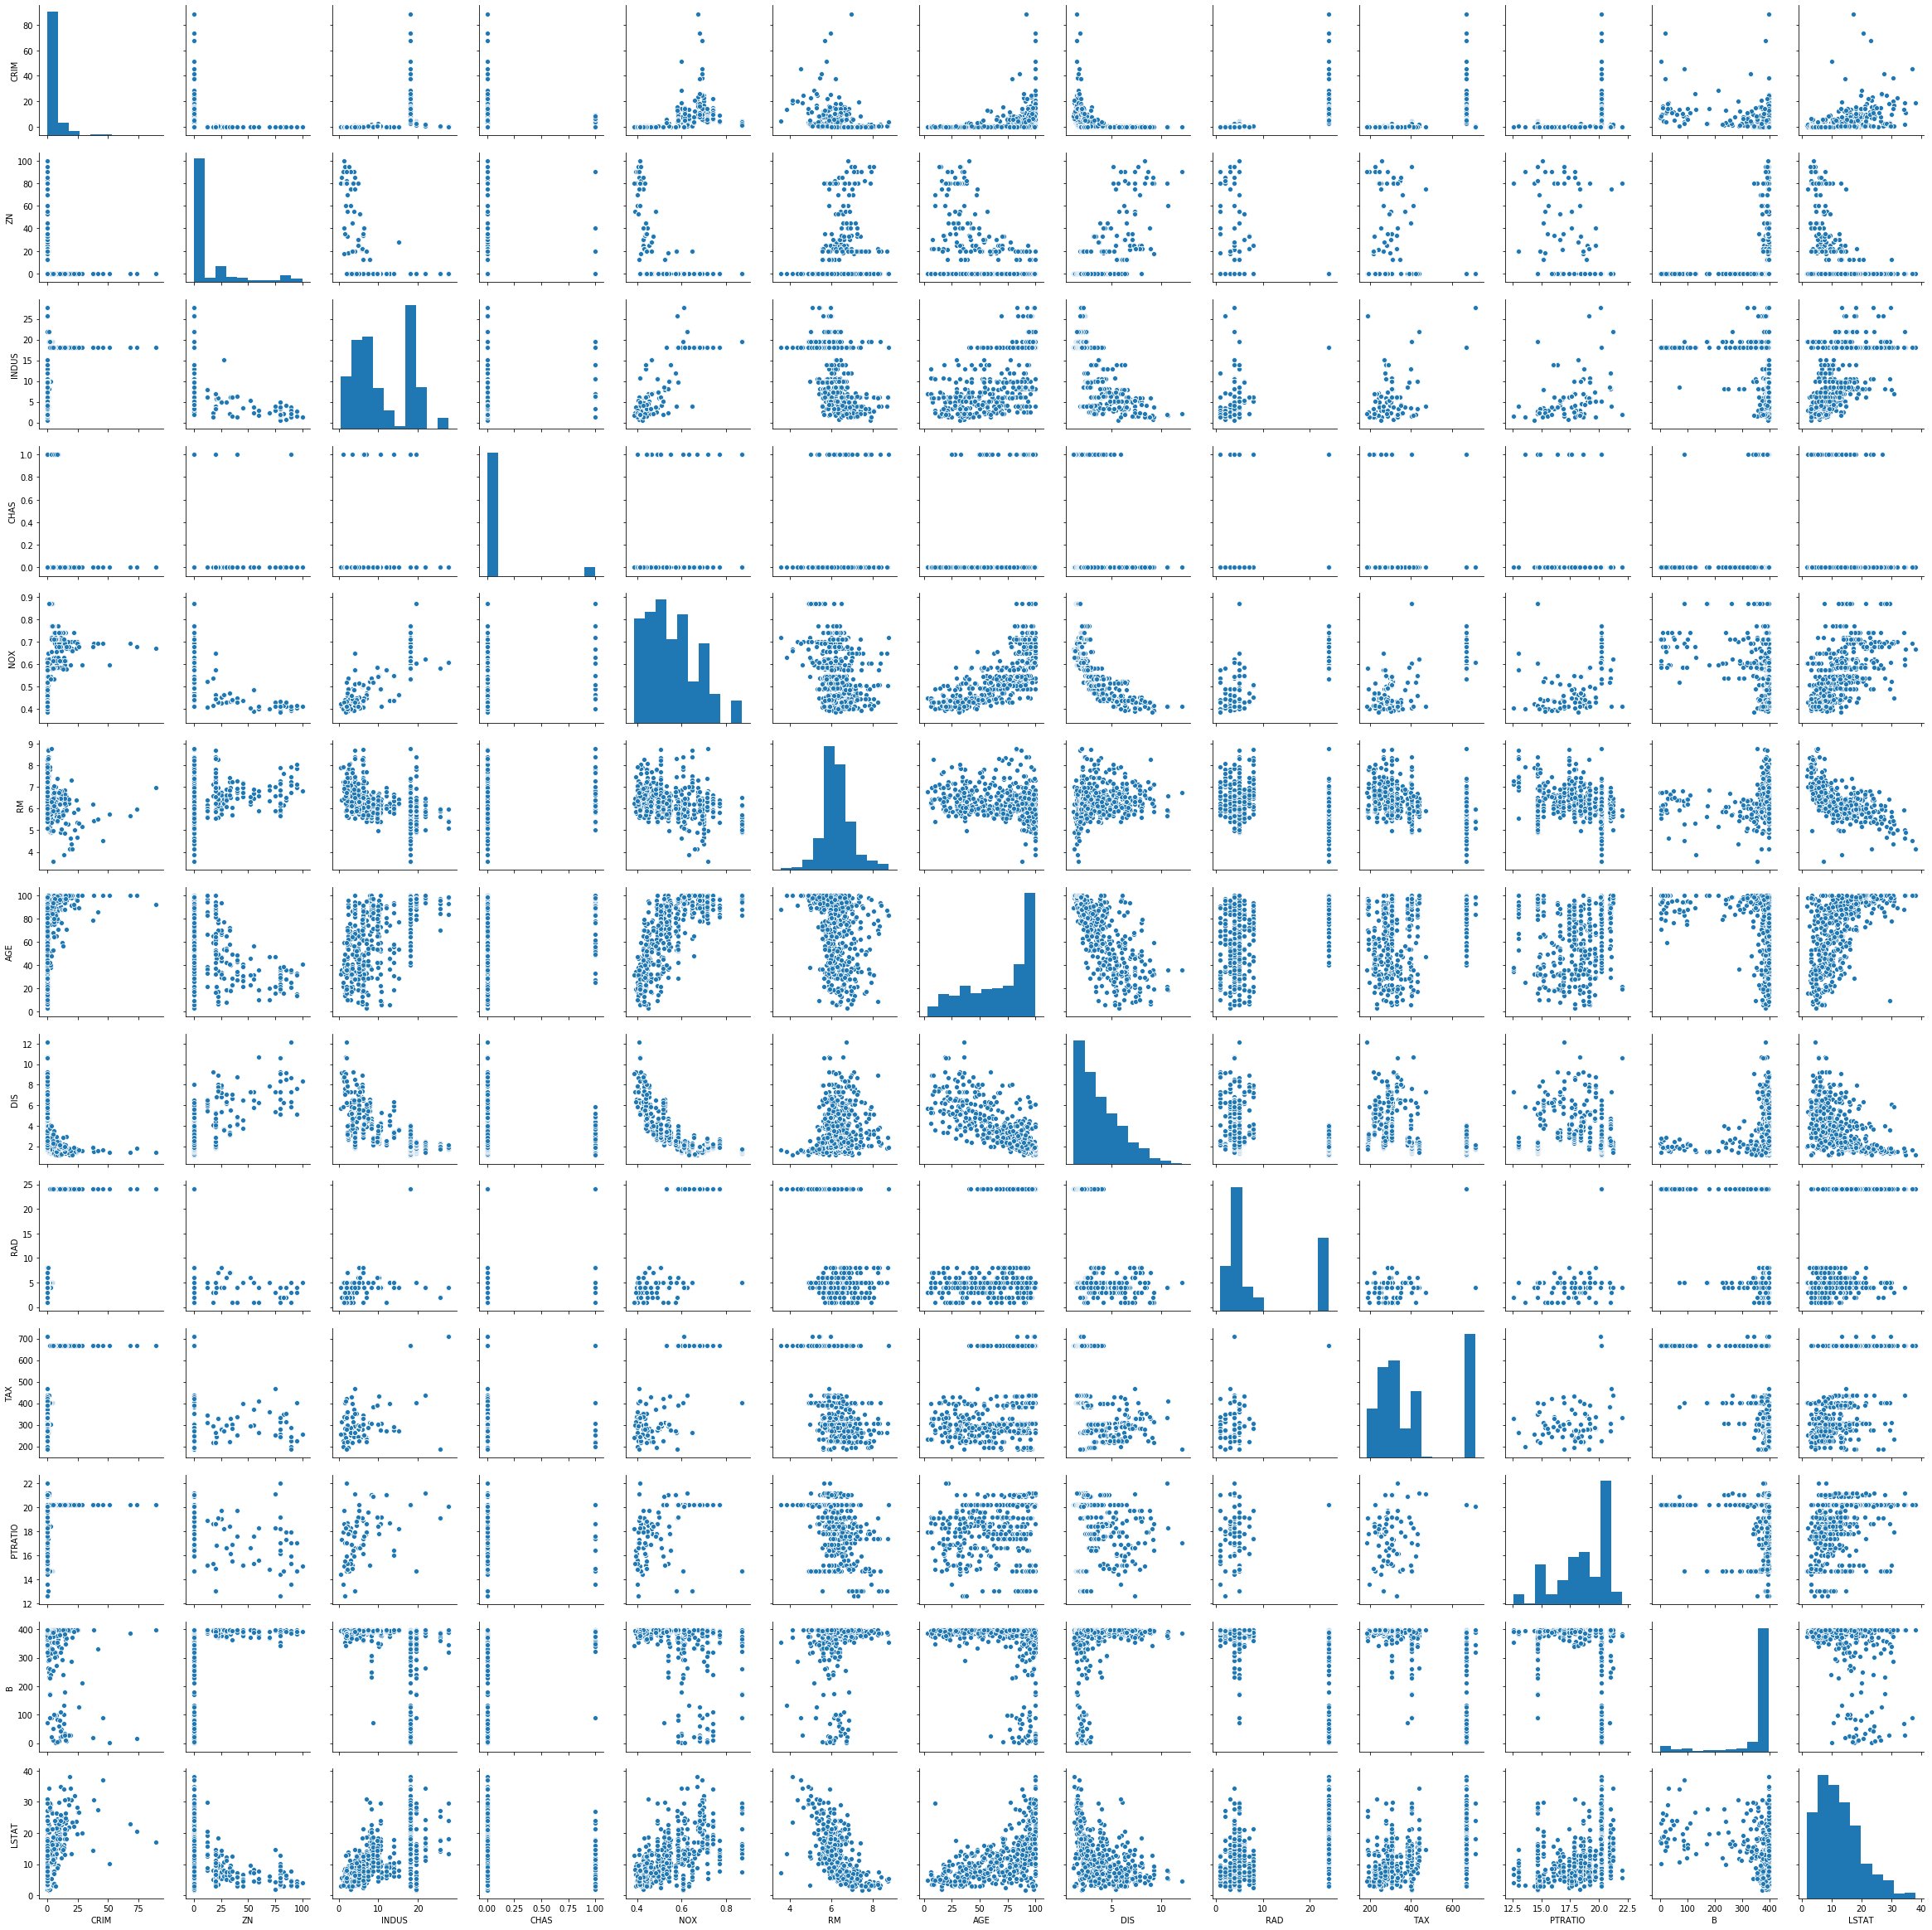

In [50]:
sns.pairplot(bos)                               #data_visualization

In [0]:
bos['Price'] = boston.target        #setting price in dataset

In [54]:
#debug/to check column names of the dataset |       run --->       bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [0]:
X = bos[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', #setting training data. X is the values and y is the value we want the model to predict
       'PTRATIO', 'B', 'LSTAT']]
y = bos['Price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=42) #splitting the dataset to testing and training methods

In [0]:
#debug 
#X_train
#X_test
#y_train
#y_test

In [0]:
from sklearn.linear_model import LinearRegression                         # |-> importing linear regression functions and initializing it as lm
lm = LinearRegression()                                                 

In [64]:
lm.fit(X_train,y_train)                                                   #fitting the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction = lm.predict(X_test)                                           #predicting the data. prediction ------->> predicted data
#debug[prediction]

In [0]:
r = y_test                                                      #real values
p = prediction                                                 #predicted values

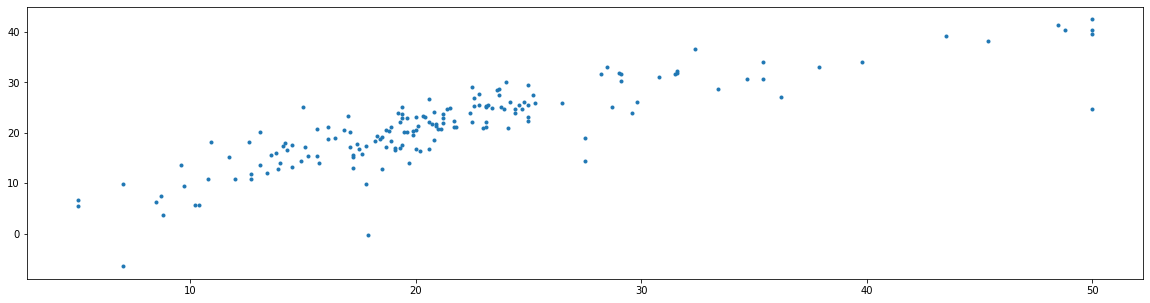

In [83]:
#data visualization scatterplot
plt.figure(figsize=(20,5))
plt.scatter(r,p,marker='.')

In [80]:
#setting the real and predicted values in a dataset
pv = {'Real Values':r, 'Predicted Values': p}
pdf = pd.DataFrame(pv)
pdf.reset_index()

,index,Real Values,Predicted Values
0,173,23.6,28.534695
1,274,32.4,36.618701
2,491,13.6,15.637511
3,72,22.8,25.501450
4,452,16.1,18.709673
...,...,...,...
162,110,21.7,21.057443
163,321,23.1,25.017346
164,265,22.8,27.654619
165,29,21.0,20.702058


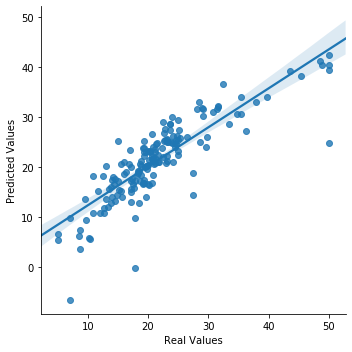

In [82]:
sns.lmplot(x='Real Values', y='Predicted Values', data = pdf)     #seaborn linear model plot

In [91]:
#lm coeffecients are values upon which changes in predicted value is seen.
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
CRIM,-0.128750
ZN,0.037823
INDUS,0.058211
CHAS,3.238668
NOX,-16.169812
RM,3.902051
AGE,-0.012851
DIS,-1.422224
RAD,0.234854
TAX,-0.008213
